In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy import latex
from IPython.display import display, Markdown
import matplotlib.colors as mcolors
from itertools import product
import draft_v2
import Helper
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

**Introduction**

In the following section, the improved full-spacetime metric is defined/implemented in the code. Based on: https://arxiv.org/abs/2406.03909. In the following, all quoted equations are taken from this paper, unless another source is given.

**Variables**

The metric equations are depndend on four variables.
1. $M$ which refers to the mass of the BH (Blackhole).
2. $R_s=2MG$ which is the gravitational radius of the BH.
3. $Q_b$ which is a defined  quantitie to modifie the spacetime metric.
4. $Q_c$ which is also a defined  quantitie to modifie the spacetime metric.

In the first section of the code we define all these variables, and in the following sections of the code we define various functions that rely on $Q_b$ and $Q_c$. 

**Background of $Q_b$ and $Q_c$**

$Q_b$ and $Q_c$ are defined trough the following mathematical Form (compare eq. 4.19 - 4.20): 

\begin{align}Q_b&=|\beta_b|\gamma^2L_0^2 \\Q_c&=|\beta_c|\gamma^2L_0^6 \end{align}

where $\beta_b$ and $\beta_c$ are the so called GUP parameters and $\gamma$ is the Barbero-Immirzi parameter.

**Immirzi parameter**

"The Immirzi parameter measures the size of the quantum of area in Planck units." [https://en.wikipedia.org/wiki/Immirzi_parameter]. 

Its value is: 

\begin{align} \gamma=\begin{cases} \frac{\ln(2)}{\sqrt{3}\pi} \\\frac{\ln(3)}{\sqrt{8}\pi}\end{cases} \end{align}

Note: The way of choosing the Immirzi parameter recovers the Bekenstein-Hawking formula. (For more information, see the Wikipedia article linked above)

**GUP paramters $\beta_b$ and $\beta_c$**

The GUP parameters are used to generalise the uncertainty principle. More information can be found either in section 3.1 of https://arxiv.org/abs/2406.03909 or on Wikipedia https://en.wikipedia.org/wiki/Generalized_uncertainty_principle.

In [95]:
# definig variables 
gamma = Helper.SymbolWithValue('gamma', np.log(2) / (np.sqrt(3) * np.pi))
beta_b, beta_c = Helper.SymbolWithValue('beta_b', 0), Helper.SymbolWithValue('beta_c', 0)
L_0 = Helper.SymbolWithValue('L_0', 5)
M = 1
r = sp.Symbol("r", nonnegative=True)

# definitions to calculate Q_b/c in dependence of beta and L_0 which gives us more possibilitys  to compare the influence of Q_b/c on different eq.

Q_b = Helper.SymbolicFunction2(abs(beta_b) * gamma ** 2 * L_0 ** 2, [gamma, L_0], beta_b, name='Q_b')
Q_c = Helper.SymbolicFunction2(abs(beta_c) * gamma ** 2 * L_0 ** 6, [gamma, L_0], beta_c, name='Q_c')

'''
-----------------------------------------------------------------------------------------------------------------------------------------------------
'''
display(Markdown("## Check definitons:"))

Helper.printTeX(Q_b.sym, Text='Q_b=')
Helper.printTeX(Q_c.sym, Text='Q_c=')

## Check definitons:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Improved full spacetime metric**

In the following we will impliment the Improved full spacetime metric tensor in the code using the following equations: 
\begin{align}
f(t)&=\left(1+\frac{Q_b}{r^2}\right)\cdot\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{-\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right) \\
g(t)&=\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right)^{-1} \\
h(t)&=r^2\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\\
\text{with: }&\text{diag}(-f,g,h, \sin^2(\theta)h)
\end{align}
[Compare eq. 4.25-4.27] 

In [96]:
R_s = sp.Symbol('R_s')

q_b, q_c = sp.Symbol('Q_b'), sp.Symbol('Q_c')
param= (q_b, q_c, R_s)

f = sp.Lambda((r, param), (1 + q_b / r**2) * (1 + q_c * (R_s)**2 / (4 * r**8))**(-1 / 4) * ( 1 - (R_s)/ sp.sqrt(r**2 + q_b )))
g = sp.Lambda((r, param), (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4) * (1 - R_s / sp.sqrt(r**2 + q_b ))**(-1))
h = sp.Lambda((r, param), r**2 * (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4))


'''
-----------------------------------------------------------------------------------------------------------------------------------------------------
'''
display(Markdown("## Check definitons:"))
Helper.printTeX(f.expr, 'f=')
Helper.printTeX(g.expr, 'g=')
Helper.printTeX(h.expr, 'h=')


## Check definitons:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [97]:
Schwarzschield = draft_v2.MetricSystem(f, g, h, (beta_b.value, beta_c.value, L_0.value))
Impr = draft_v2.MetricSystem(f, g, h, (q_b, q_c, R_s))
BlackHole =  draft_v2.BH(M, [Schwarzschield, Impr], ['Schwarzschield', 'Impr'])

display(Markdown("## Check definitons:"))
display(Markdown("Schwarzschield:"))
~BlackHole.Schwarzschield()
Helper.printTeX(BlackHole.Schwarzschield().line_element())
display(Markdown("Improved:"))
~BlackHole.Impr()

## Check definitons:

Schwarzschield:

$$\begin{align*}
    \eta{}_{t}{}_{t} &= -1 + \frac{5}{r} \\
    \eta{}_{r}{}_{r} &= \frac{1}{1 - \frac{5}{r}} \\
    \eta{}_{\theta}{}_{\theta} &= r^{2} \\
    \eta{}_{\phi}{}_{\phi} &= r^{2} \sin^{2}{\left(\theta \right)} 
\end{align*}$$

<IPython.core.display.Math object>

Improved:

$$\begin{align*}
    \eta{}_{t}{}_{t} &= - \frac{\left(\frac{Q_{b}}{r^{2}} + 1\right) \left(- \frac{R_{s}}{\sqrt{Q_{b} + r^{2}}} + 1\right)}{\left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25}} \\
    \eta{}_{r}{}_{r} &= \frac{\left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25}}{- \frac{R_{s}}{\sqrt{Q_{b} + r^{2}}} + 1} \\
    \eta{}_{\theta}{}_{\theta} &= r^{2} \left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25} \\
    \eta{}_{\phi}{}_{\phi} &= r^{2} \left(\frac{Q_{c} R_{s}^{2}}{4 r^{8}} + 1\right)^{0.25} \sin^{2}{\left(\theta \right)} 
\end{align*}$$


Comment: As you can see, we created the Scharzschield metric using the improved metric and setting the parameters to 0.

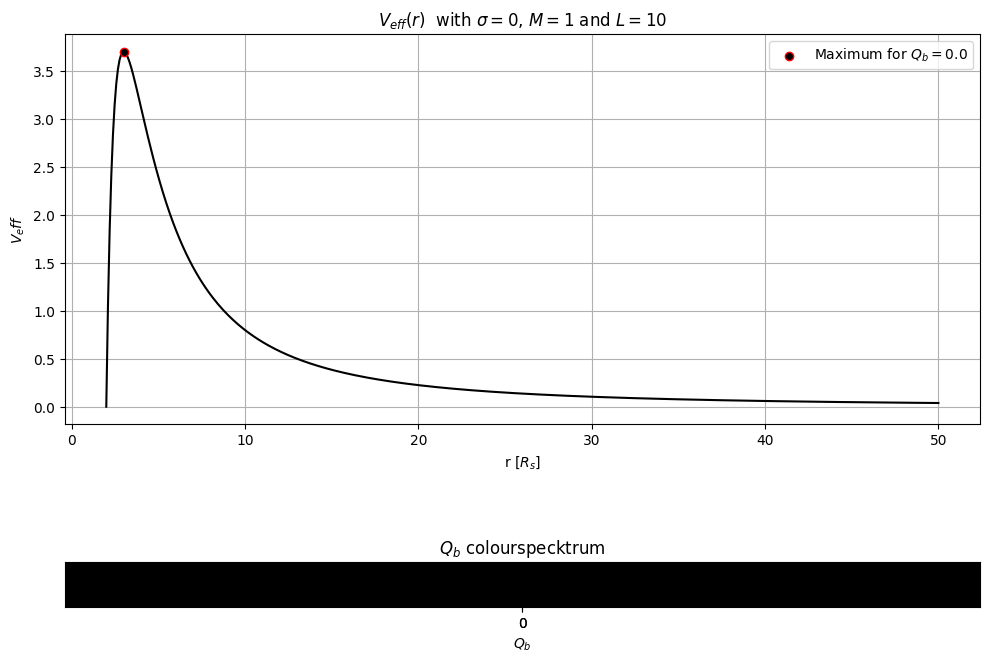

In [98]:
Helper.Veff_plt( BlackHole.Impr,sigma=0, grad=1,L=10, r_int=[2,50])

In [203]:
Helper.trPlot(BlackHole.Impr, grad=1,sigma=0, E = 0.0495,L=10, end=500, M=1, r_0=200)
#Helper.trPlot(BlackHole.Impr, grad=10,sigma=0, E = -np.sqrt(0.5),L=3.6, end=30, M=1, r_0=8)


E < V_eff(r_0)


TypeError: cannot unpack non-iterable NoneType object

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

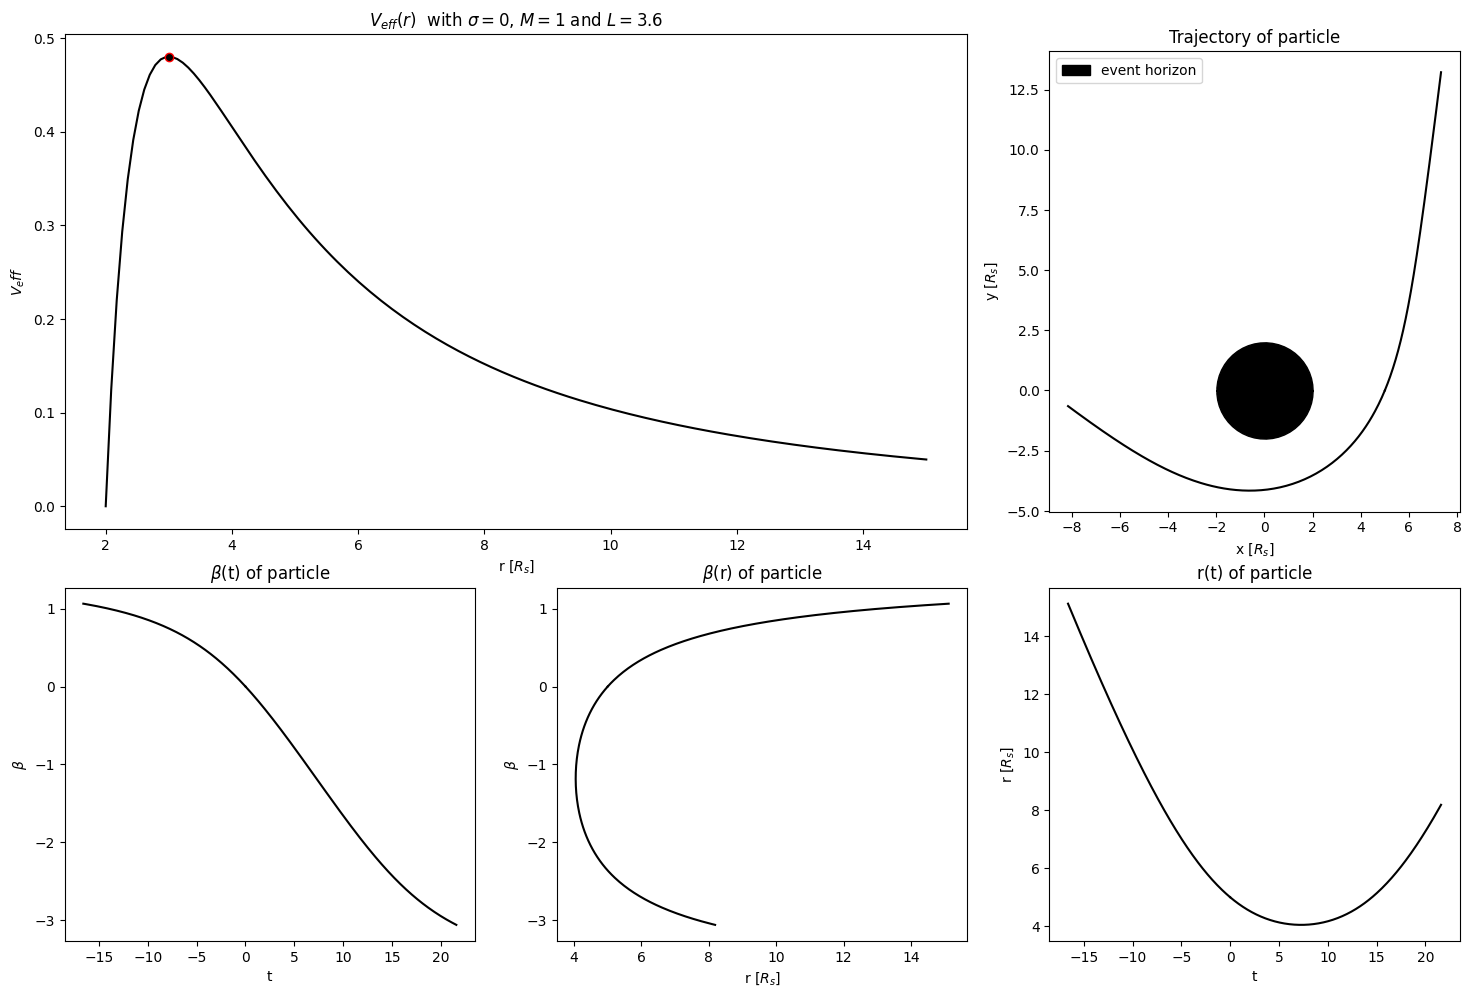

In [ ]:
Helper.trPlot(BlackHole.Impr, grad=1, sigma=0, E = -np.sqrt(0.4),L=3.6, end=20, M=1, r_0=5)
Helper.trPlot(BlackHole.Impr, grad=10, sigma=0, E = -np.sqrt(0.4),L=3.6, end=20, M=1, r_0=5)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

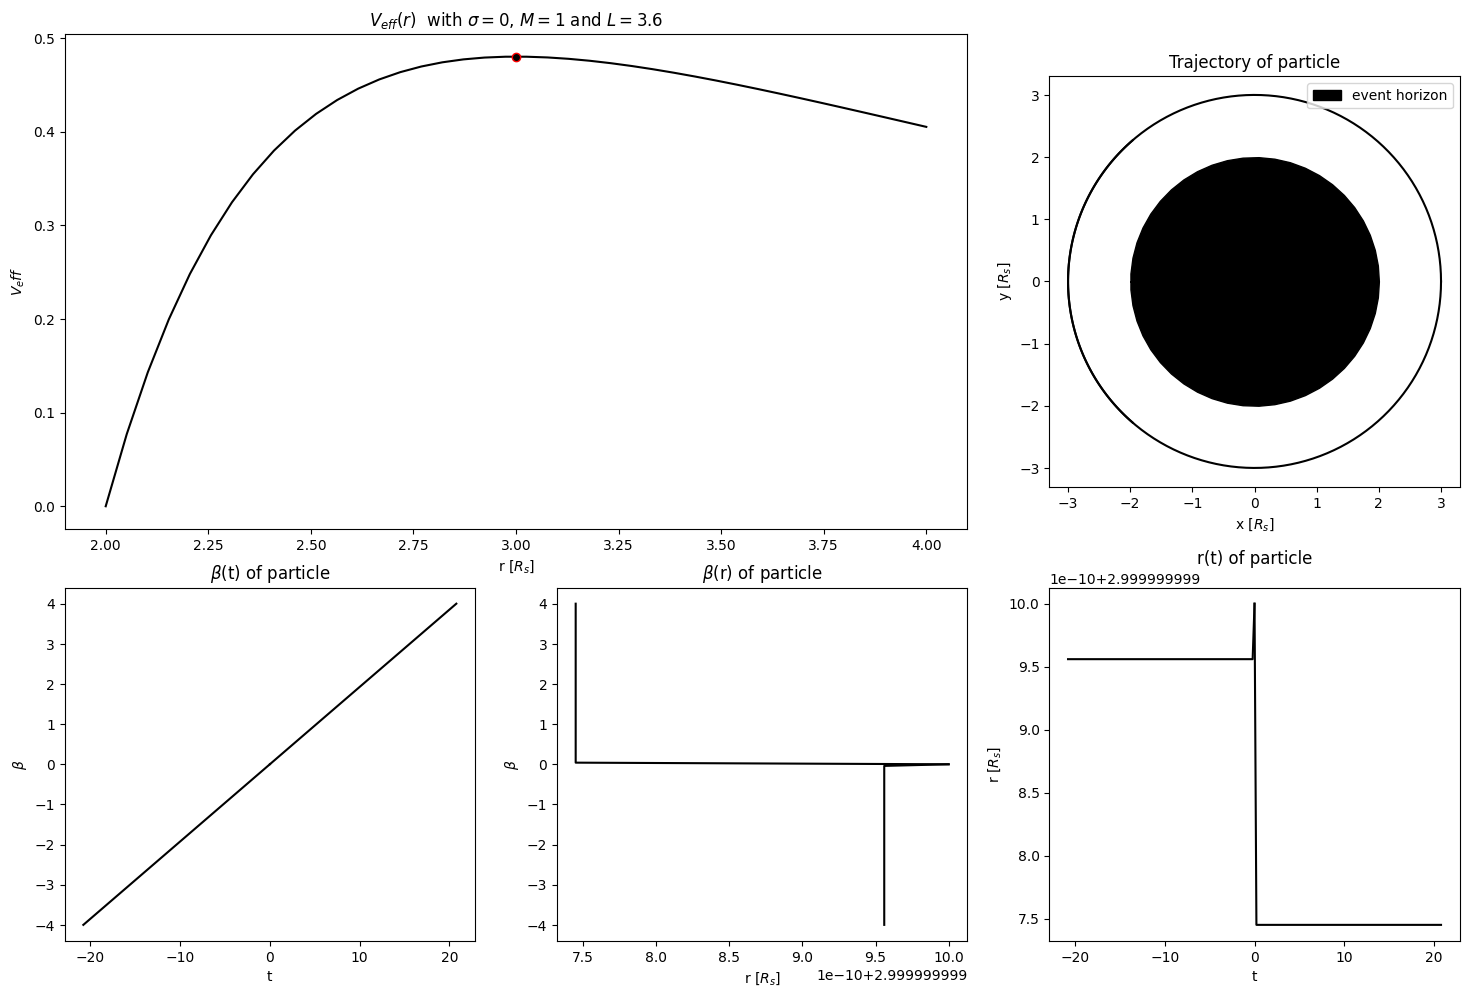

In [ ]:
Helper.trPlot(BlackHole.Impr, grad=1, sigma=0, E = np.sqrt(0.48),L=3.6, end=10, M=1, r_0=3)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

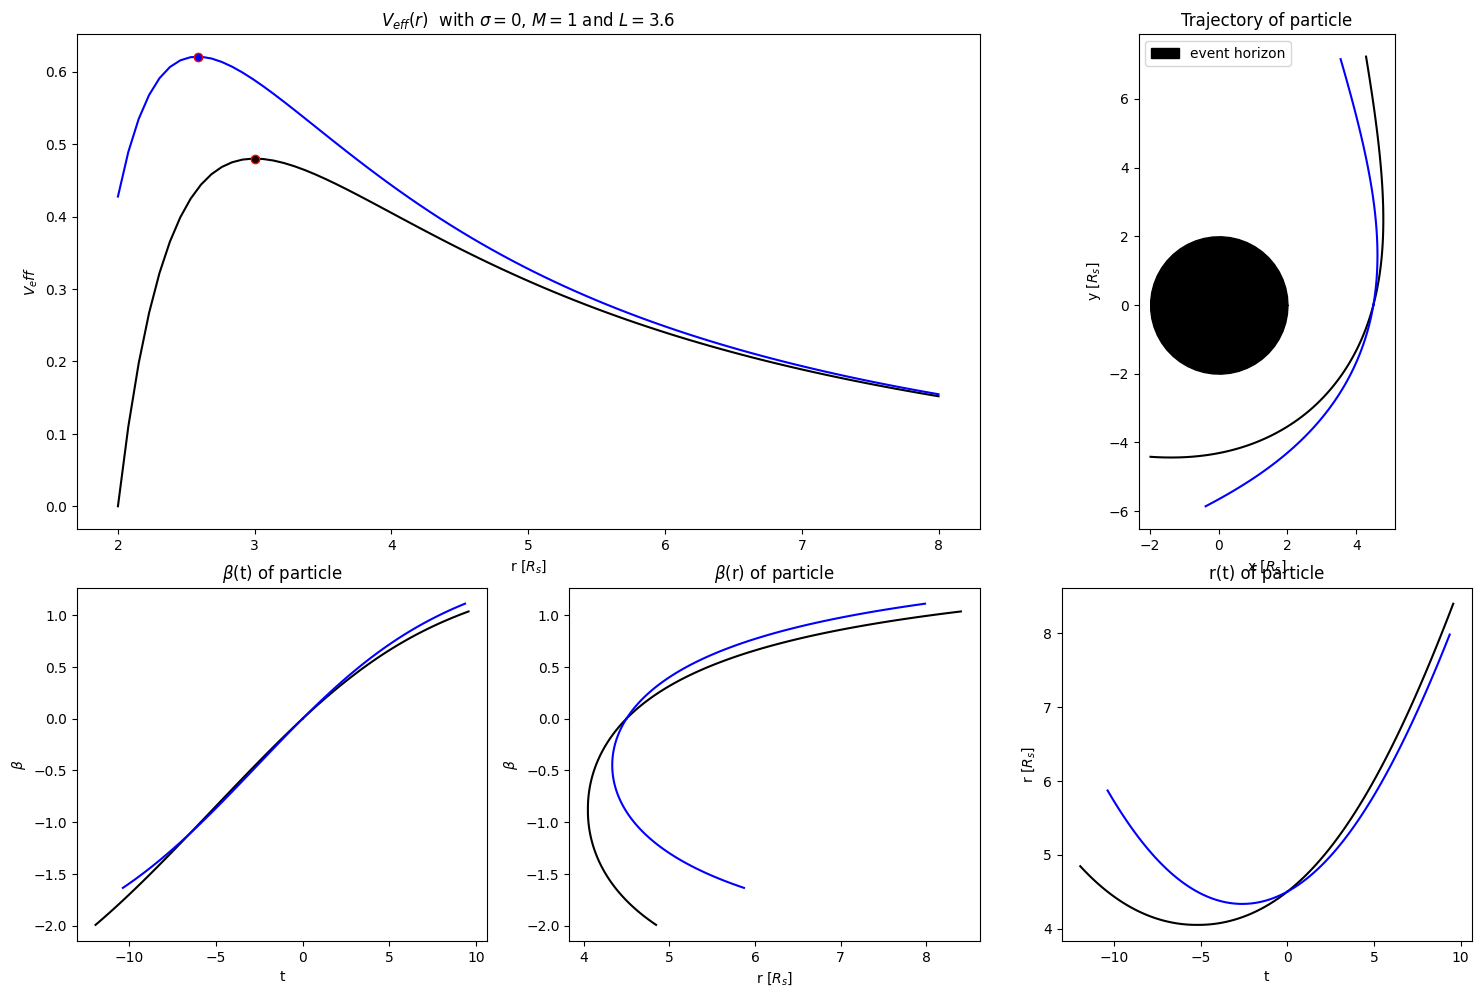

In [ ]:
Helper.trPlot(BlackHole.Impr, sigma=0, E = np.sqrt(0.4),L=3.6, end=10, M=1, r_0=4.5, param=[(0,0,2),(1,0,2)])

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

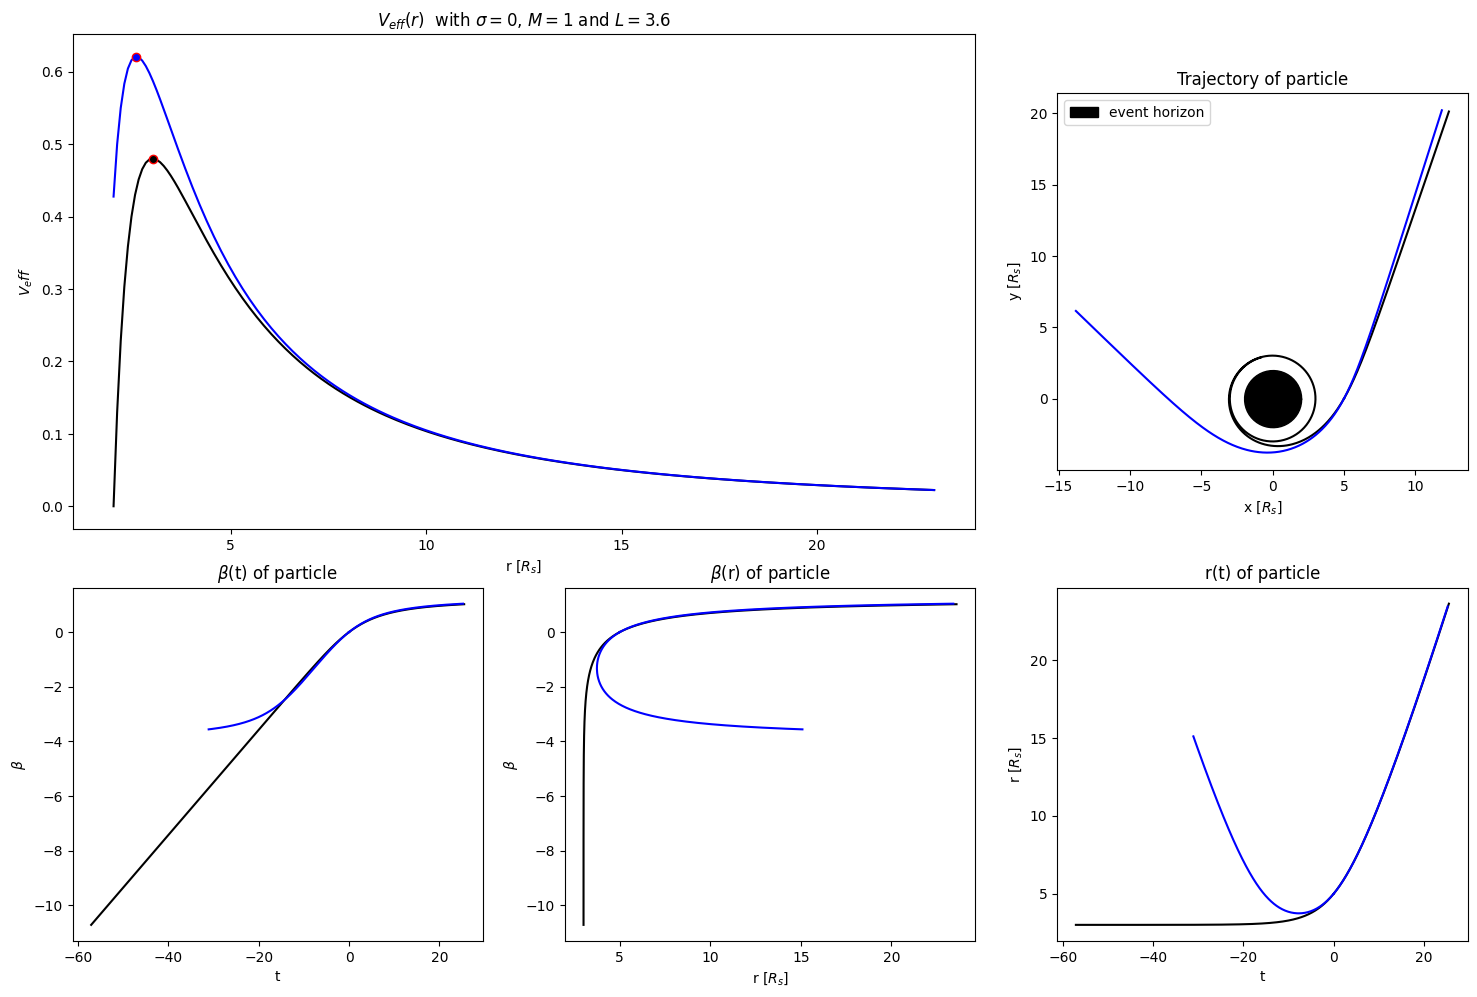

In [ ]:
Helper.trPlot(BlackHole.Impr, sigma=0, E = np.sqrt(0.48),L=3.6, end=30, M=1, r_0=5, param=[(0,0,2), (1,0,2)])

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

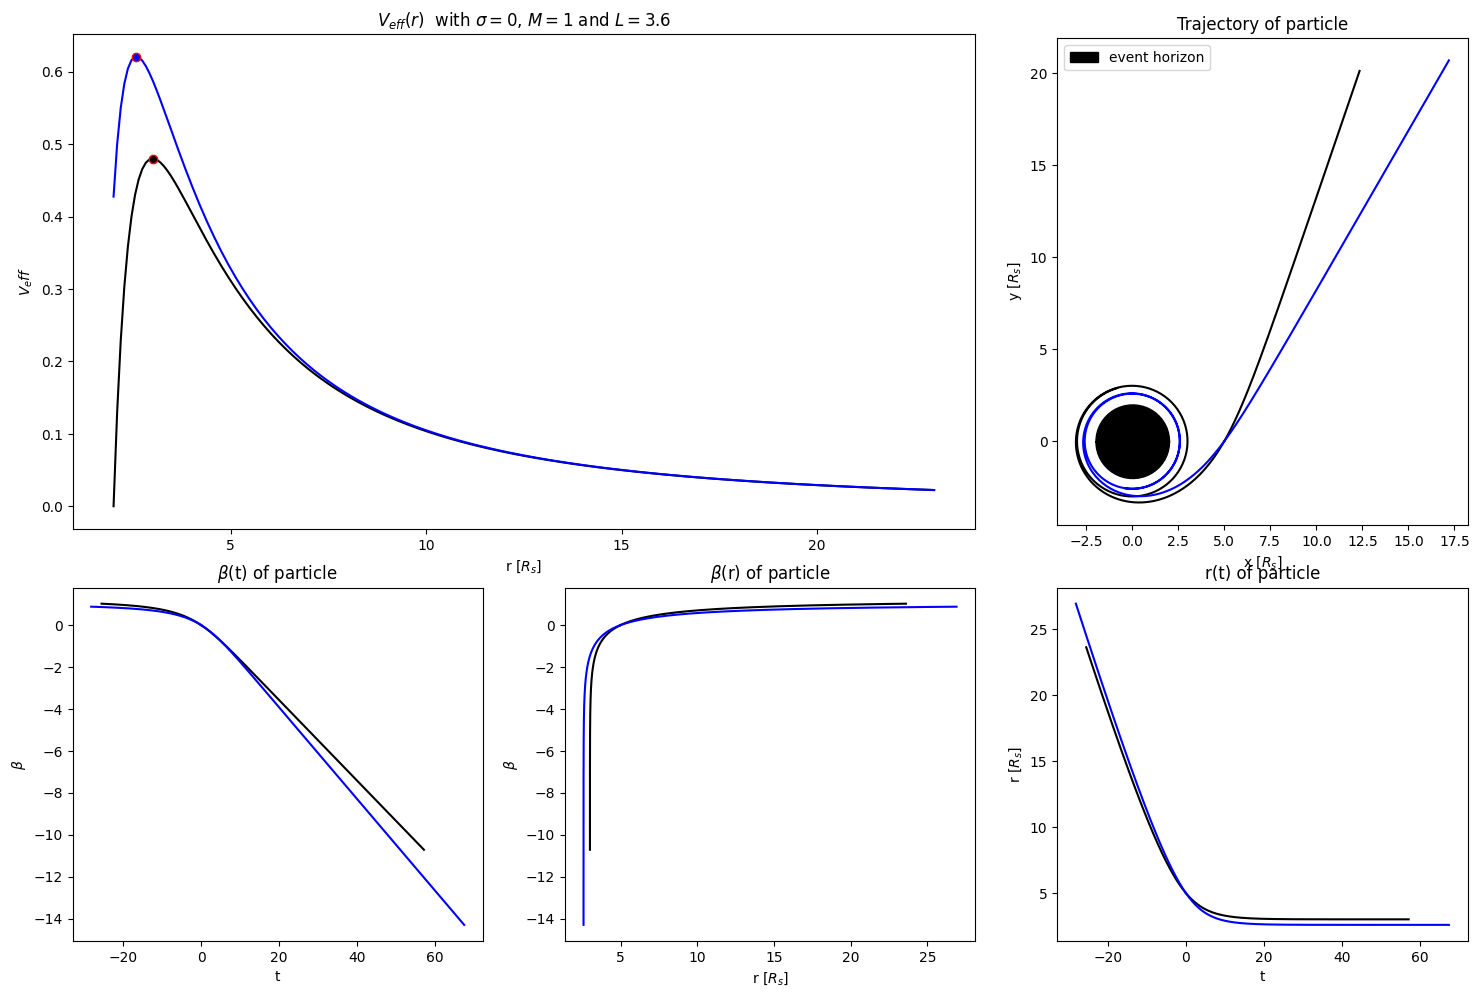

In [ ]:
BlackHole.Impr.set_parameters((1,0,2))
np.sqrt(float(BlackHole.Impr.V_eff(r_val=float(BlackHole.Impr.min_max_V_eff_debug(L=3.6, sigma=0)[1]), L=3.6, sigma=0)))
Helper.trPlot(BlackHole.Impr, sigma=0, E = [-np.sqrt(0.48),-np.sqrt(float(BlackHole.Impr.V_eff(r_val=float(BlackHole.Impr.min_max_V_eff_debug(L=3.6, sigma=0)[1]), L=3.6, sigma=0)))],L=3.6, end=30, M=1, r_0=5, param=[(0,0,2), (1,0,2)])

-173.20508049422048
E < V_eff(r_0)


TypeError: cannot unpack non-iterable NoneType object

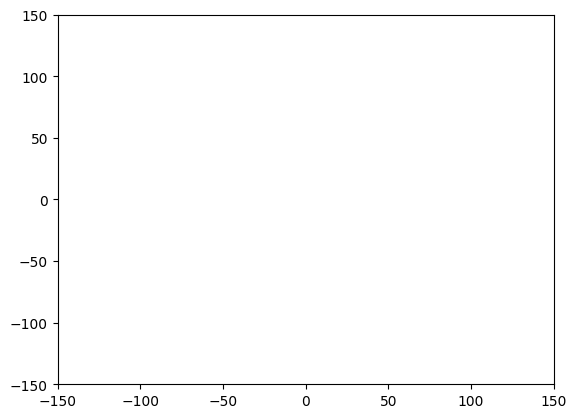

In [217]:
D_ls,D_ol=100,10
grad=100

def plotTimeDelay(metric, source=True, r_0=30, E=1, L=10, end=30,Col='blue', t_end = 118):
      
    def solve_EQ(end, L, E):
        tau_span = [0, end]
        tau_list = np.linspace(tau_span[0], tau_span[1], grad) 
        sp, sn, f = metric.solve_DAE(tau_list, tau_span, r_0, sigma =0, L = L, E = E, phi_0=3*0.79)
        #if abs(sn[0][grad-1]) < (t_end-1):
        #    n= end+ 5
        #    sn=solve_EQ(n, L, E)   


        return sn

    sn=solve_EQ(end, L, E)  

    x= sn[1] * np.cos(sn[2] )
    y= sn[1] * np.sin(sn[2] )

    return x,y, sn[0]

    #ax.plot(sp[1] * np.cos(sp[2] ), sp[1]  * np.sin(sp[2] ))
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)
n=20
lines = [
    ax.plot([], [], lw=2, color=(0, 0, 0.6))[0]
    for i in range(n+3)
]

r_0=3
x_,y_, t_=[],[],[]
x_2,y_2=[],[]
for i in range(n):
    x,y, t= plotTimeDelay(BlackHole.Impr, False, E = np.sqrt(float(BlackHole.Impr.V_eff(r_val=float(BlackHole.Impr.min_max_V_eff_debug(L=1, sigma=0)[1]), L=10, sigma=0))) - i/(n-1)* (np.sqrt(float(BlackHole.Impr.V_eff(r_val=float(BlackHole.Impr.min_max_V_eff_debug(L=1, sigma=0)[1]), L=10, sigma=0)))- 0.1 ), L=-10, Col=('red'), end=30, r_0=r_0)
    t_.append(t)
    x_.append(x)
    y_.append(y)
    #x2,y2= plotTimeDelay(BlackHole.Impr, False, E = np.sqrt(float(BlackHole.Impr.V_eff(r_val=float(BlackHole.Impr.min_max_V_eff_debug(L=1, sigma=0)[1]), L=10, sigma=0))) - np.sqrt(float(BlackHole.Impr.V_eff(r_val=float(BlackHole.Impr.min_max_V_eff_debug(L=1, sigma=0)[1]), L=10, sigma=0)))*(i)/(n+0.7), Col='red', end=30+3**i)
    #x_2.append(x2)
    #y_2.append(y2)
    print(t[grad-1])
    
def update(frame):
    x2,y2=[],[]


    ind1= int(min(abs(np.array(t_[0]-frame))))
    t = t_[0][ind1]
    
    for i in range(n):    
        ind =int(min(abs(np.array(t_[i]-frame))))

        x= x_[i][:ind]
        y=y_[i][:ind]
        lines[i].set_data(x,y)  # Setze die Daten der Linie

        if i !=0:
            x2.append(x_[i][ind-1])
            y2.append(y_[i][ind-1])

        #if frame == 90: print(t_[ind])
     #   x2= x_2[i][:frame]
      #  y2=y_2[i][:frame]
    
    #lines[n].set_data(x2,y2)  # Setze die Daten der Linie
    #lines[n+1].set_data(-1*np.array(y2),-1*np.array(x2))
    return lines

ax.scatter(0,0, c=(0,0,0))
# Erstelle die Animation
ani = FuncAnimation(fig, update, frames=grad, interval=50, blit=True)

HTML(ani.to_jshtml())


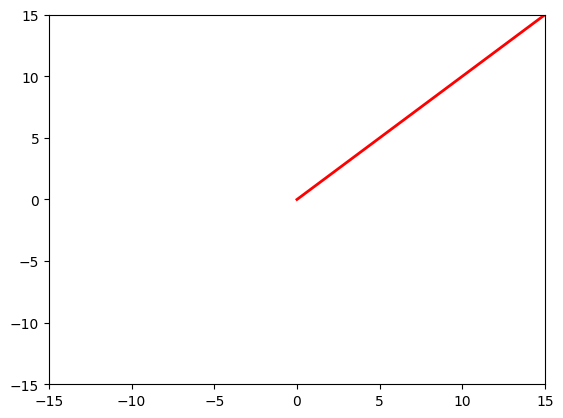

In [ ]:
def test(ax2):
    line, = ax2.plot([], [], 'r-', lw=2)

        # Funktion, die für jedes Frame der Animation aufgerufen wird
    def update(frame):
            
        x= np.linspace(0,frame,frame)
        y= np.linspace(0,frame,frame)
            
        line.set_data(x,y)  # Setze die Daten der Linie
        return line   
    return update 

fig = plt.figure()
ax2 = fig.add_subplot()
frames = 100 

ax2.set_xlim(-15, 15)
ax2.set_ylim(-15, 15)

    # Erstelle die Animation
ani = FuncAnimation(fig, test(ax2), frames=frames, interval=50, blit=True)

ax.set_xlim(-22, 15)
ax.set_ylim(-22, 15)

HTML(ani.to_jshtml())


In [ ]:

plotTimeDelay(ax, BlackHole.Impr, False, E=1.5, end=100, Col=(1, 0.65,0))
plotTimeDelay(ax, BlackHole.Impr, False, E=1, end=100, Col=(1, 0.75,0))
plotTimeDelay(ax, BlackHole.Impr, False, E=0.75, end=100, Col=(1, 0.85,0))
plotTimeDelay(ax, BlackHole.Impr, False, E=0.6, end=100, Col=(1, 0.95,0))
plotTimeDelay(ax, BlackHole.Impr, False, E=0.5, end=100, Col=(1, 1,0))

plotTimeDelay(ax, BlackHole.Impr, False, E=np.sqrt(float(BlackHole.Impr.V_eff(r_val=float(BlackHole.Impr.min_max_V_eff_debug(L=1, sigma=0)[1]), L=10, sigma=0))), L=-10, Col='red')
plotTimeDelay(ax, BlackHole.Impr, False, E=1.5, end=100,L=-10, Col=(1, 0.65,0))
plotTimeDelay(ax, BlackHole.Impr, False, E=1, end=100,L=-10, Col=(1, 0.75,0))
plotTimeDelay(ax, BlackHole.Impr, False, E=0.75, end=100,L=-10, Col=(1, 0.85,0))
plotTimeDelay(ax, BlackHole.Impr, False, E=0.6, end=100,L=-10, Col=(1, 0.95,0))
plotTimeDelay(ax, BlackHole.Impr, False, E=0.5, end=100,L=-10, Col=(1, 1,0))

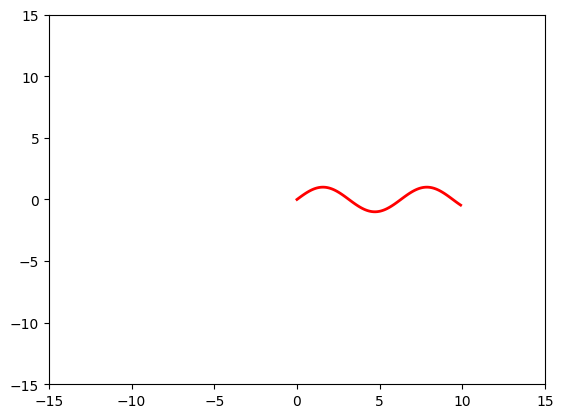

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameter
r_0 = np.array([0, 0])  # Startpunkt der Kurve
t_max = 10  # Maximale Zeit für die Animation
frames = 100  # Anzahl der Frames

# Funktion, die die Position der Kurve für einen gegebenen t berechnet
def curve(t):
    return np.cos(t)  # Beispiel: Kreisbahn
def curvey(t):
    return np.sin(t)

# Erstelle das Plot und die Achsen
fig, ax = plt.subplots()
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

# Line, die wir animieren möchten
line, = ax.plot([], [], 'r-', lw=2)

# Funktion, die für jedes Frame der Animation aufgerufen wird
def update(frame):
    t = np.linspace( 0 ,frame * t_max / frames, frame)
    x = t
    y = curvey(t)
    line.set_data(x, y)  # Setze die Daten der Linie
    return line,

# Erstelle die Animation
ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

# Zeige die Animation im Jupyter Notebook
HTML(ani.to_jshtml())


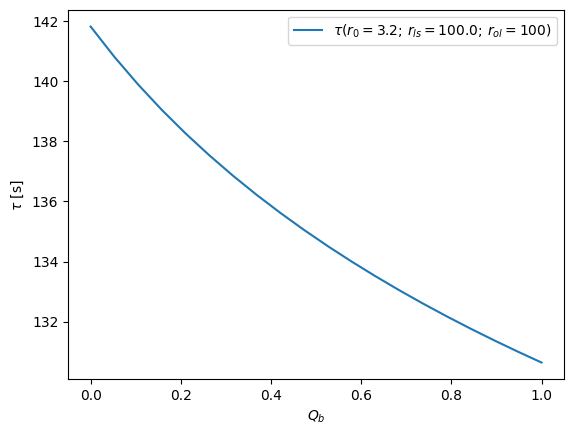

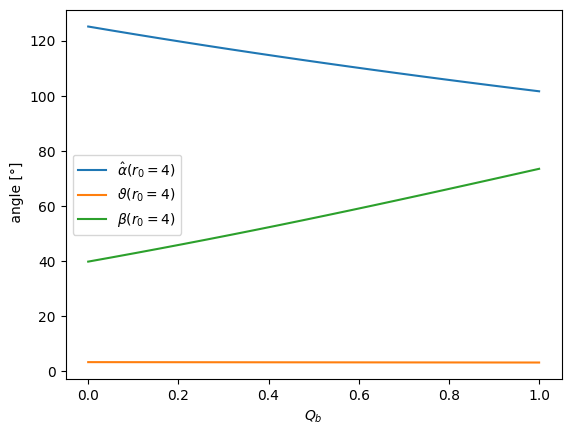

In [ ]:
def PlotTimeDelay(ax, metric, grad=20, D_ls=100,D_ol=100,r_0=3.6, beta=0):
    D_os= D_ol + D_ls
    
    TimeDelay_arry=[]
    Q_b=np.linspace(0,1,grad)
    for i in range(len(Q_b)):
       metric.set_parameters((Q_b[i],0,2))
       TimeDelay_arry.append(metric.Time_Delay(r_0,D_ls,D_ol, beta))
    
    r_ls=np.sqrt(D_ls**2+D_os**2*np.tan(beta)**2)
    ax.plot(Q_b, TimeDelay_arry, label=fr'$\tau(r_{{0}}={r_0}; \, r_{{ls}}={r_ls}; \, r_{{ol}}={D_ol} )$')
    ax.set_xlabel(fr'$Q_b$')
    ax.set_ylabel(fr'$\tau$ [s]')

def Light_deflection(ax, metric, grad=20 ,r_0=3.6, beta=0, D_ls=100,D_ol=100):
    Light_def=[]

    Q_b=np.linspace(0,1,grad)
    for i in range(len(Q_b)):
       metric.set_parameters((Q_b[i],0,2))
       Light_def.append(metric.Light_deflection(r_0 )*180/np.pi)

    ax.plot(Q_b, Light_def, label=fr'$\hat\alpha(r_{{0}}={r_0})$')
    ax.set_xlabel(fr'$Q_b$')
    ax.set_ylabel(fr' angle [°]')

def Theta(ax, metric, grad=20 ,r_0=3.6, beta=0, D_ls=100,D_ol=100):
    Theta_arra=[]
    Q_b=np.linspace(0,1,grad)
    for i in range(len(Q_b)):
       metric.set_parameters((Q_b[i],0,2))
       Theta_arra.append(metric.Theta(r_0, D_ol)*180/np.pi)

    ax.plot(Q_b, Theta_arra, label=fr'$\vartheta(r_{{0}}={r_0})$')
    ax.set_xlabel(fr'$Q_b$')
    ax.set_ylabel(fr' angle [°]')

def Beta(ax, metric, grad=20 ,r_0=3.6, beta=0, D_ls=100,D_ol=100):
    Beta_arra=[]
    Q_b=np.linspace(0,1,grad)
    for i in range(len(Q_b)):
       metric.set_parameters((Q_b[i],0,2))
       Beta_arra.append(metric.Beta(r_0, D_ol, D_ls)*180/np.pi)

    ax.plot(Q_b, Beta_arra, label=fr'$\beta(r_{{0}}={r_0})$')
    ax.set_xlabel(fr'$Q_b$')
    ax.set_ylabel(fr' angle [°]')


In [ ]:

def plotSourcePoints(ax, metric, source=True, r_0=20, D_ls=100,D_ol=100, end=300,blue=0, skizze=True):
    L=np.sqrt(float(metric.h.subs(r,r_0)))
    E=np.sqrt(float(metric.f.subs(r,r_0)))

    tau_span = [0, end]
    tau_list = np.linspace(tau_span[0], tau_span[1], 200) 
    sp, sn, f = metric.solve_DAE(tau_list, tau_span, D_ol, sigma =0, L = L, E = E, phi_0=-0.5*np.pi)

    b=20
    beta=(np.pi/2-abs(np.arctan(   (sn[1][b] * np.sin(sn[2][b])+D_ol) / (sn[1][b] * np.cos(sn[2][b])))))*abs(np.arctan(   (sn[1][b] * np.sin(sn[2][b])+D_ol) / (sn[1][b] * np.cos(sn[2][b])))) / (np.arctan(   (sn[1][b] * np.sin(sn[2][b])+D_ol) / (sn[1][b] * np.cos(sn[2][b]))))
    
    if beta != 0: D_os=D_ls/np.sin(beta)*np.sin( np.pi - beta- np.arcsin(beta* D_ol / D_ls))
    else: D_os= D_ls+D_ol

    differenzen=np.abs(sn[1][30:] - D_ls)
    ind=np.argmin(differenzen)+30
    ax.scatter(sn[1][ind] * np.cos(sn[2][ind]), sn[1][ind] * np.sin(sn[2][ind])+D_ol ,zorder=6, color=(0,0,blue), label=f'S with $Q_b={blue}$')
    ax.plot(sn[1][:ind] * np.cos(sn[2][:ind] ), sn[1][:ind]  * np.sin(sn[2][:ind] )+D_ol, color=(0,0,blue))
    ax.set_aspect('equal', adjustable='datalim')

    if source:
        ax.scatter((D_os *np.sin(beta)), (D_os *np.cos(beta)), zorder=5, label='I', color='gray')
        ax.plot((0, D_os *np.sin(beta)), (0,D_os *np.cos(beta)), zorder=-1, color='gray', linestyle='--')

    if skizze:
        ax.plot((0,sn[1][ind] * np.cos(sn[2][ind])), (0, sn[1][ind]  * np.sin(sn[2][ind])+D_ol), linestyle='--', color='gray')
        ax.plot((0,sn[1][ind] * np.cos(sn[2][ind])), (0, sn[1][ind]  * np.sin(sn[2][ind])+D_ol), linestyle='--', color='gray')

        ax.plot((0, 0), (0, D_ol), zorder=-1, color='green', linestyle='--')

        winkel=np.linspace(np.pi/2 , np.pi/2 - beta)
        R=D_ol/3
        ax.plot(R*np.cos(winkel), R*np.sin(winkel), color='gray')

        winkel=np.linspace(np.arctan((sn[1][ind]  * np.sin(sn[2][ind])+D_ol)/(sn[1][ind] * np.cos(sn[2][ind]))), np.pi/2 - beta)
        R=D_ol/2
        ax.plot(R*np.cos(winkel), R*np.sin(winkel), color='gray')
    ax.autoscale(enable=True, axis='both', tight=False)



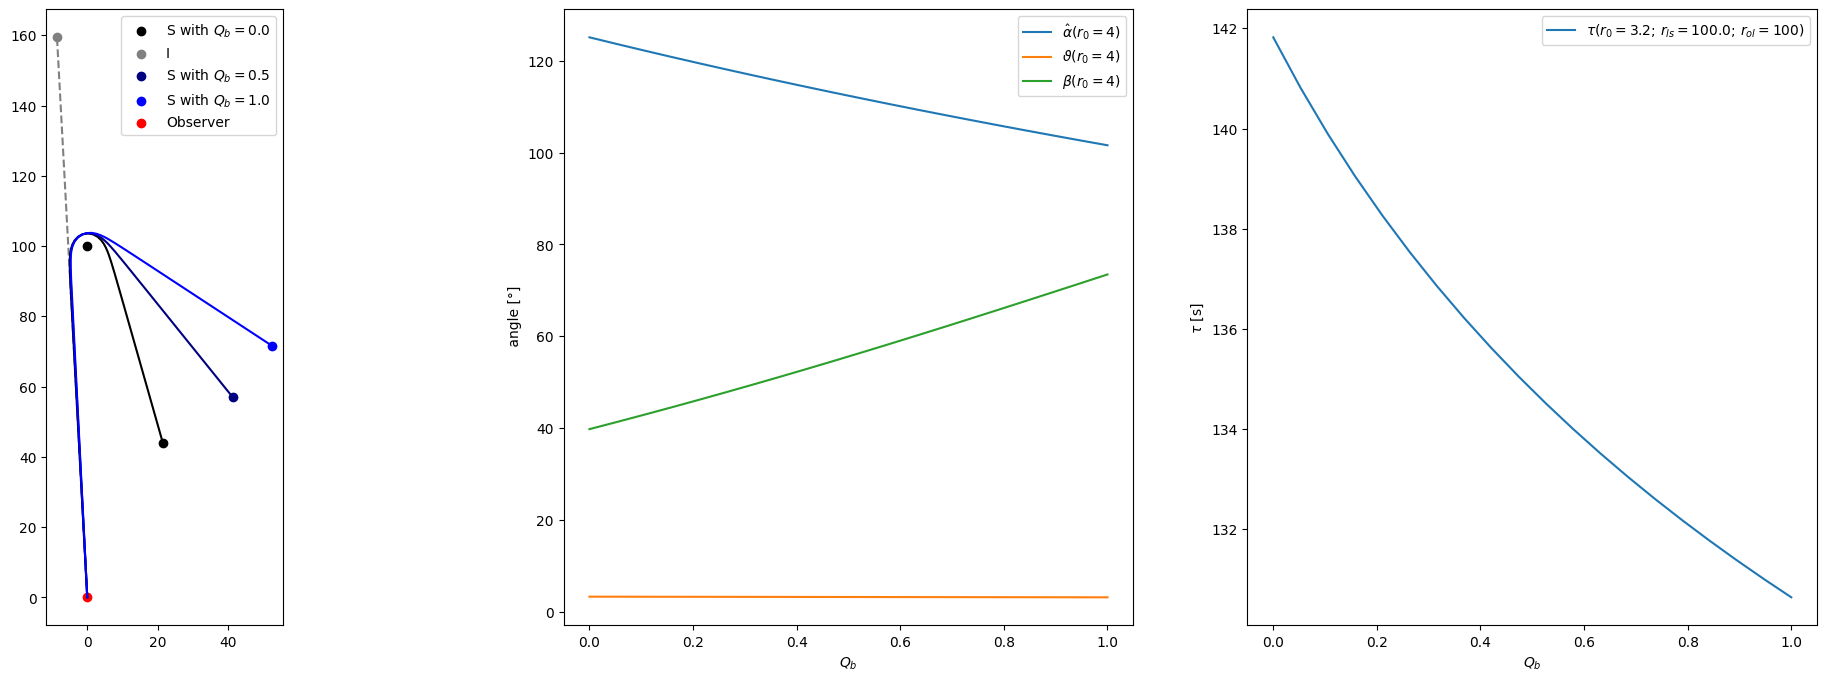

In [ ]:
grad=3
D_ls=60
D_ol=100
r_0=3.6
fig, ax = plt.subplots(1, 3, figsize=(25, 8))  
Q_b=np.linspace(0,1,grad)
for i in range(len(Q_b)):
    BlackHole.Impr.set_parameters((Q_b[i],0,2))
    plotSourcePoints(ax[0], BlackHole.Impr, r_0=r_0, blue=Q_b[i], D_ls=D_ls, D_ol=D_ol, source= i==0, skizze=False)

ax[0].scatter((0), (D_ol), zorder=5, c='black')
ax[0].scatter(0,0, c='red', label='Observer')
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()

Light_deflection(ax[1], BlackHole.Impr, r_0=4)
Theta(ax[1], BlackHole.Impr, r_0=4)
Beta(ax[1], BlackHole.Impr, r_0=4)
PlotTimeDelay(ax[2], BlackHole.Impr, r_0=3.2)
ax[1].legend()
ax[2].legend()
